In [1]:
import os
import numpy as np
import pandas as pd
import random
import datetime
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
# 指定檔案位置，包含完整路徑以及檔案名稱
# os.curdir: 回傳目前目錄的路徑
# 若無法在個人電腦上以 Anaconda 開啟 Notebook，請用Google Colab開啟，並將下兩行程式的註解消除，再將 turbofan.csv 和 turbofan_rul.csv資料上傳 
# Turbofan_FILEPATH = os.path.join(os.curdir, 'turbofan.csv')
# Turbofan_RUL_FILEPATH = os.path.join(os.curdir, 'turbofan_rul.csv')
Turbofan_FILEPATH = os.path.join(os.curdir, 'data', 'turbofan.csv')
Turbofan_RUL_FILEPATH = os.path.join(os.curdir, 'data', 'turbofan_rul.csv')

# 檢視檔案位置
print(Turbofan_FILEPATH)

# 讀取 CSV 檔案，並將其指定為名稱是 df (DataFrame) 的物件
df = pd.read_csv(filepath_or_buffer=Turbofan_FILEPATH)
df_bak = df.copy()

df_rul = pd.read_csv(filepath_or_buffer=Turbofan_RUL_FILEPATH)
df_rul_bak = df_rul.copy()

./data/turbofan.csv


In [4]:
df.head()

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN


# 第 6 章：修改資料

有時候僅僅執行運算或是篩選是不夠的。我們常常聽到「清理資料」的名詞，意思就是在分析以前，資料常常要經過大規模的整理，才能夠被順利地使用。

這個章節將會介紹許多涵蓋整份資料結構改變的操作，例如轉換資料型別、轉置、或是將部分資料結合再運算、以及清除遺漏的值、也可能要進行補值。

希望經過這些處理以後，可以讓各位要進行分析的數據更完整、也更準確！

## 修正資料

### 利用 `.loc` 和 `.iloc` 在特定範圍修改資料

`.loc`, `.iloc` attribute 除了可以取得指定範圍的資料之外，也可以用來編輯該範圍的資料內容。

編輯多筆資料時，請注意資料的形狀是否與指定的範圍相同；而如果只對她們指定單一數值，將會把該範圍的數值都用單一數值取代。

In [6]:
# 觀察 感測器22(column label: 'sensor_22') 中資料的情況
df.loc[:, 'sensor_22'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: sensor_22, dtype: float64

In [10]:
sensor_22_isna_index = df[df.loc[:, 'sensor_22'].isna()].index
df.loc[sensor_22_isna_index, 'sensor_22'] = 0

In [8]:
# 例：利用先前介紹的 isna() 來為遺漏值補值
sensor_22_isna_index = df[df.loc[:, 'sensor_22'].isna()].index
df.loc[sensor_22_isna_index, 'sensor_22'] = 0
df.head(10)

# 當然，這了例子使用這種做法不夠直覺
# 我們之後還會講到 `.fillna()` method，更好用！

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,0.0,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,0.0,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,0.0,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,0.0,NaN,NaN,NaN,NaN,NaN
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,...,2388,100.0,38.98,23.3669,0.0,NaN,NaN,NaN,NaN,NaN
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,...,2388,100.0,39.10,23.3774,0.0,NaN,NaN,NaN,NaN,NaN
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,...,2388,100.0,38.97,23.3106,0.0,NaN,NaN,NaN,NaN,NaN
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,...,2388,100.0,39.05,23.4066,0.0,NaN,NaN,NaN,NaN,NaN
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,...,2388,100.0,38.95,23.4694,0.0,NaN,NaN,NaN,NaN,NaN


In [15]:
# 還原資料
df = df_bak.copy()

### `.replace()`：替換數值

`.replace()` method 的用法，除了單純將固定的數值或文字替換掉以外，更進階且快速的用法則可以使用**正規表示式**來建立取代的條件，礙於篇幅無法介紹，請自行參閱正規表示式的相關文章。

* 常用 Parameters：
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html#pandas-dataframe-replace)
    * [pandas.Series.replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html#pandas-series-replace)
    * [Wikipedia | 正規表示式](https://zh.wikipedia.org/zh-tw/正規表示式)


In [16]:
# 觀察感測器22 (column label: 'sensor_22') 中，
# 感測器22資料 (NR) 的情況
df.loc[:, 'sensor_22'].head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: sensor_22, dtype: float64

In [18]:
df = df.replace({'sensor_22':{np.nan:0}})

In [11]:
# 將 感測器22 數值為 NaN 的取代成 0
df.replace({'sensor_22': {np.nan: 0}}, inplace=True)
df = df.replace({'sensor_22': {np.nan: 0}})

display(df.loc[:, 'sensor_22'].head(10))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: sensor_22, dtype: float64

In [19]:
# 還原資料
df = df_bak.copy()

### `.rename()`：編輯 Row 或 Column 的 Label

如果 label 不易辨識或是不如預期時，之後操作時出錯的機率可能會上升，像是取錯 column 放入其他函式的問題，造成結果也是錯的。為了避免這種情況發生，事前將 label 準備成容易一眼辨識的名稱也是很重要的。

取代規則的格式可以是一個 `dict` 物件，他們的 key 跟 value 則分別是**被取代的 label** 跟**取代之後的 label**；也可以放入一個 function。

參考文件：
* [pandas.DataFrame.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html#pandas-dataframe-rename)
* [pandas.Series.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rename.html#pandas-series-rename)
    

In [20]:
df_rul.columns

Index(['unit_number', 'time_in_cycles', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'RUL'],
      dtype='object')

In [21]:
# 示範使用 dict (Dictionary) 逐一修改
# 例：將 columns label 為 'RUL' 改成 'remaining_useful_life'
df_rul.rename(columns={'RUL':'remaining_useful_life'}, inplace=True)
display(df_rul.columns)

Index(['unit_number', 'time_in_cycles', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20',
       'sensor_21', 'remaining_useful_life'],
      dtype='object')

In [22]:
# 還原資料
df_rul = df_rul_bak.copy()

In [17]:
# 示範使用 lambda function
# 例：將所有 columns label 改成大寫英文字母，且將 '_' 改成 ' '
df.rename(columns=lambda x: x.upper().replace('_', ' '), inplace=True)
display(df.columns)

Index(['UNIT NUMBER', 'TIME IN CYCLES', 'OP SETTING 1', 'OP SETTING 2',
       'OP SETTING 3', 'SENSOR 1', 'SENSOR 2', 'SENSOR 3', 'SENSOR 4',
       'SENSOR 5', 'SENSOR 6', 'SENSOR 7', 'SENSOR 8', 'SENSOR 9', 'SENSOR 10',
       'SENSOR 11', 'SENSOR 12', 'SENSOR 13', 'SENSOR 14', 'SENSOR 15',
       'SENSOR 16', 'SENSOR 17', 'SENSOR 18', 'SENSOR 19', 'SENSOR 20',
       'SENSOR 21', 'SENSOR 22', 'SENSOR 23', 'SENSOR 24', 'SENSOR 25',
       'SENSOR 26', 'SENSOR 27'],
      dtype='object')

In [18]:
# 還原資料
df = df_bak.copy()

### `.sort_values()`：以數值大小排序

適當的將資料給排序也有助於觀察資料的樣態。這裡先介紹的是依照數值大小來排序的 method，往後還會介紹到針對 index (row index) 來排序的 method。

* 常用 Parameters（以 DataFrame 為例）：
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `by`：設定排序參照的對象
        * `str`：以某一個 columns label 或 row label 排序
        * `list`：依照順序以多個 columns label 或 row label 排序
    1. `ascending`：是否使用升冪排序，預設為 `True`
    1. `na_position`：資料中有 `NaN` 數值時，指定排序後要將 `NaN` 放置於開頭或結尾，預設為 `last`
        * `first`：把 NaN 放在開頭
        * `last`：把 NaN 放在最後
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas-dataframe-sort-values)
    * [pandas.Series.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html#pandas-series-sort-values)


In [19]:
# 將資料以 感測器3 (columns label: 'sensor_3') 由小到大排序，且 NaN 放在開頭
df.sort_values(axis=0, by='sensor_3', ascending=True, na_position='first', inplace=True)
display(df.loc[:, 'sensor_3'].tail(10))

17131    1611.57
7825     1611.92
846      1612.11
10529    1612.63
2704     1612.88
16131    1613.29
2126     1613.62
13629    1614.72
7823     1614.93
20425    1616.91
Name: sensor_3, dtype: float64

In [20]:
# 還原資料
df = df_bak.copy()

In [22]:
# Series 也可以調用 sort_values()
df.loc[:, 'sensor_3'].sort_values(ascending=False).head(10)

20425    1616.91
7823     1614.93
13629    1614.72
2126     1613.62
16131    1613.29
2704     1612.88
10529    1612.63
846      1612.11
7825     1611.92
17131    1611.57
Name: sensor_3, dtype: float64

### `.sort_index()`：以 Index Label 大小排序

比較常見的情況在於使用 `datetime` 物件當作 row index 時，可以讓資料依照時間順序來排列。

* 常用 Parameters : 
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `ascending`：是否使用升冪排序，預設為 `True`
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_index.html#pandas-dataframe-sort-index)
    * [pandas.Series.sort_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sort_values.html#pandas-series-sort-values)


In [23]:
# 將資料以 row index 降冪排序
df.sort_index(ascending=False, inplace=True)
display(df.head())

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,2388,100.0,38.37,23.0522,NaN,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN,NaN
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 還原資料
df = df_bak.copy()

In [25]:
# 將 columns index 升冪（字母 A 到 Z 排序）
df.sort_index(axis=1, inplace=True, ascending=True)
display(df.head())

,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,...,sensor_27,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,time_in_cycles,unit_number
0,-0.0007,-0.0004,100.0,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,...,NaN,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1,1
1,0.0019,-0.0003,100.0,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,...,NaN,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,2,1
2,-0.0043,0.0003,100.0,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,...,NaN,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,3,1
3,0.0007,0.0000,100.0,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,...,NaN,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,4,1
4,-0.0019,-0.0002,100.0,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,...,NaN,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,5,1


In [26]:
# 還原資料
df = df_bak.copy()

### `.reset_index()`：重設 Index Label 

預設會將 row index 給重設為從 0 開始的數列，在常見的使用情境在資料列有修改的情況，例如用 `.drop()` method 刪除部分的 row 以後。

* 常用 Parameters：
    1. `drop`：重設 index 之後是否刪除被取代的 index
        * `True`：刪除原始的 row index
        * `False`：保留原始的 row index
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html#pandas-dataframe-reset-index)
    * [pandas.Series.reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html#pandas-series-reset-index)

In [39]:
# range(0, 12)：建立一個 0~11的整數數列
# random.randint(50, 300)：從 50~300之間隨機回傳一個值
tmp = pd.DataFrame({"id":range(0, 12), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 12)]})
tmp.set_index("id", inplace=True)
display(tmp)
tmp.drop(index=[0, 4, 8], inplace=True)
display(tmp)

,RAINFALL
id,
0,248
1,121
2,294
3,228
4,296
5,195
6,235
7,251
8,218


,RAINFALL
id,
1,121
2,294
3,228
5,195
6,235
7,251
9,230
10,206
11,238


In [40]:
# 重設 index label 且保留原本的 index label 作為一個 column
tmp.reset_index(drop=False)

,id,RAINFALL
0,1,121
1,2,294
2,3,228
3,5,195
4,6,235
5,7,251
6,9,230
7,10,206
8,11,238


In [42]:
# 重設 index label 且"不"保留原本的 index label
tmp.reset_index(drop=True)

,RAINFALL
0,121
1,294
2,228
3,195
4,235
5,251
6,230
7,206
8,238


### `.set_index()`：將某個 Column (Column Labels) 設為 Index (Row Labels)

調用 `set_index()` method 以將目前的 index (row labels) 用某個 column 的內容 (column labels) 來取代，常見的情境可以將帶有 `datetime` 物件的 column 給設為 index。

參考文件：[pandas.DataFrame.set_index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html)

    

In [23]:
# set_index
# 將 日期 設定為 index
tmp = pd.DataFrame({"time":pd.date_range('2020-01', '2021-01', freq="M"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 12)]})
display(tmp)
tmp.set_index("time", inplace=True)
display(tmp)

,time,RAINFALL
0,2020-01-31,189
1,2020-02-29,134
2,2020-03-31,118
3,2020-04-30,91
4,2020-05-31,280
5,2020-06-30,77
6,2020-07-31,165
7,2020-08-31,298
8,2020-09-30,272
9,2020-10-31,248


,RAINFALL
time,
2020-01-31,189
2020-02-29,134
2020-03-31,118
2020-04-30,91
2020-05-31,280
2020-06-30,77
2020-07-31,165
2020-08-31,298
2020-09-30,272


### `.drop()`：刪除特定的 row 或 column


調用 `drop()` method 可以用來刪除指定的 row/column。

使用時，可以在 parameter `labels` 指定要刪除的 index (row label) 或是 column (column label)，或是個別在 parameter `index` 或 `columns` 指定要刪除的 label。

* 文件連結：
    * [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#pandas-dataframe-drop)
    * [pandas.Series.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.drop.html#pandas-series-drop)



In [26]:
# 先使用 describe 觀察 設定值1 (column label: 'op_setting_1') 的資料分佈
df['op_setting_1'].describe()

count    20631.000000
mean        -0.000009
std          0.002187
min         -0.008700
25%         -0.001500
50%          0.000000
75%          0.001500
max          0.008700
Name: op_setting_1, dtype: float64

In [30]:
op_setting_2_iszero_indexes = df[df['op_setting_2']==0].index
df.drop(index=op_setting_2_iszero_indexes, inplace=True)

In [33]:
df.drop(columns=['sensor_22', 'sensor_23'], inplace=True)

In [35]:
df.columns

Index(['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2',
       'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27'],
      dtype='object')

In [29]:
# 例：刪除 設定值1 為 0 的資料
# 使用 boolean index 取得 設定值1 為 0 的 index (row label)
op_setting_1_iszero_indexes = df.loc[df['op_setting_1'] == 0, :].index

# 使用 drop 將這些 index (row label) 的資料刪除
# 再觀察資料分佈
df.drop(index=op_setting_1_iszero_indexes)['op_setting_1'].describe()

count    20218.000000
mean        -0.000009
std          0.002210
min         -0.008700
25%         -0.001500
50%          0.000100
75%          0.001500
max          0.008700
Name: op_setting_1, dtype: float64

In [36]:
# 還原資料
df = df_bak.copy()

### `.dropna()`：刪除遺漏值 (NA)

將資料中帶有遺漏值的部分給刪除。

* 常用 Parameters：
    1. `axis`：操作的座標軸
        * `0`：將 dataframe 以 row 方向排序
        * `1`：將 dataframe 以 column 方向排序
    1. `how`：刪除資料的策略，預設為 `any`
        * `all`：若此 column 或 row 的每一個數值全部都是 `NaN`，才刪除此 column 或 index
        * `any`：若此 column 或 row 的只要有任何數值為 `NaN`，就刪除此 column  或 index
* 參考文件：
    * [pandas.DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas-dataframe-dropna)
    * [pandas.Series.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html#pandas-series-dropna)

In [40]:
# 先製作一個比較小的 DataFrame 來展示功能
tmp_dropna = pd.DataFrame({"A" : [10, 10, 11, np.nan], 
                           "B" : [5.5, 5.5, np.nan, 10.2], 
                           "C" : [np.nan, 200, 230, 260],
                           "D" : [10, 5.5, 11.0, 10.2],
                           "E" : [np.nan, np.nan, np.nan, np.nan]
                          })
tmp_dropna

,A,B,C,D,E
0,10.0,5.5,NaN,10.0,NaN
1,10.0,5.5,200.0,5.5,NaN
2,11.0,NaN,230.0,11.0,NaN
3,NaN,10.2,260.0,10.2,NaN


In [41]:
tmp_dropna.dropna(axis=1, how='all')

,A,B,C,D
0,10.0,5.5,NaN,10.0
1,10.0,5.5,200.0,5.5
2,11.0,NaN,230.0,11.0
3,NaN,10.2,260.0,10.2


In [38]:
# 例：若 row 出現 NaN，則刪除此筆資料
tmp_dropna.dropna(axis=0, how='any')

,A,B,C,D
1,10.0,5.5,200.0,5.5


In [39]:
# 若 column 出現 NaN 則刪除此筆資料
tmp_dropna.dropna(axis=1, how='any')

,D
0,10.0
1,5.5
2,11.0
3,10.2


### `.fillna()`：為遺漏值補上數值

`.fillna()` method 可以為資料提供一個統一的策略，產生數值來替代遺漏值。
    

* 常用 Parameters：
    1. `value`：給定一個值（可以是 Series，Dataframe，dict）去填補遺失值，例如 `0`
    1. `method`：設定補值策略
        * `bfill` / `backfill`：由後往前補值
        * `pad` / `ffill`：由前往後補值
    1. `inplace`：是否選擇直接修改資料而不回傳處理結果，預設為 `False`
* 參考文件：
    * [pandas.DataFrame.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas-dataframe-fillna)
    * [pandas.Series.fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html#pandas-series-fillna)
    * [10 MInutes to pandas | Missing Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#missing-data)


> 備註—有關遺漏值的兩三事：
>
> 所謂的**遺漏值，在文件中常稱為 NA (Not available)**，包含 `None`  或  `NaN` (`numpy.NaN`)，
>
> 但是 `' '`（空白字元）或 `numpy.inf`（無限大數）則不屬於 **NA**。

In [53]:
# 先製作一個比較小的 DataFrame 來展示功能
tmp_fillna = pd.DataFrame({'A' : pd.Series([1, np.nan, 2, np.nan, np.nan, 3]),
                           'B' : pd.Series([np.nan, np.nan, 200, np.nan, np.nan, 300])})
tmp_fillna

,A,B
0,1.0,NaN
1,NaN,NaN
2,2.0,200.0
3,NaN,NaN
4,NaN,NaN
5,3.0,300.0


In [54]:
# 補值方法 1: 設定 value 為特定值
# 例：以該 column 的平均值來補值
tmp_fillna.fillna(tmp_fillna.mean())

,A,B
0,1.0,250.0
1,2.0,250.0
2,2.0,200.0
3,2.0,250.0
4,2.0,250.0
5,3.0,300.0


In [55]:
# 補值方法 2: bfill（由後往前補值）
tmp_fillna.fillna(method='bfill')

,A,B
0,1.0,200.0
1,2.0,200.0
2,2.0,200.0
3,3.0,300.0
4,3.0,300.0
5,3.0,300.0


In [56]:
# 補值方法 3: ffill（由前往後補值）
# .fillna(method='ffill')
tmp_fillna.fillna(method='ffill')

,A,B
0,1.0,NaN
1,1.0,NaN
2,2.0,200.0
3,2.0,200.0
4,2.0,200.0
5,3.0,300.0


### `.T`：DataFrame 轉置

回傳以對角線為對稱方向對調後的資料。

* 文件連結：[pandas.DataFrame.transpose](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transpose.html)


In [57]:
# transpose

# 在 dataframe 資料顯示上，會將 觀察項目 作為 columns，而每一筆觀察資料 作為 rows
# 但是當拿到一份資料時，可能資料紀錄的方式剛好相反，如下，觀察項目在 rows，每個時間點的觀察資料為 columns
# 這時候可以使用 .T 進行轉置

In [60]:
# 先製作一個比較小的 DataFrame 來展示功能
tmp_t = pd.DataFrame({'2017-01-01 01:00:00':[20.0, 2.0, 0.20, 0.04], 
                       '2017-01-01 02:00:00':[20.0, 2.2, 0.19, 0.05], 
                       '2017-01-01 03:00:00':[19.0, 2.2, 0.24, 0.08]},
                       index=['AMB_TEMP', 'CH4', 'CO', 'NMHC'])
tmp_t

,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00
AMB_TEMP,20.00,20.00,19.00
CH4,2.00,2.20,2.20
CO,0.20,0.19,0.24
NMHC,0.04,0.05,0.08


In [61]:
# 嘗試轉置
tmp_t.T

,AMB_TEMP,CH4,CO,NMHC
2017-01-01 01:00:00,20.0,2.0,0.20,0.04
2017-01-01 02:00:00,20.0,2.2,0.19,0.05
2017-01-01 03:00:00,19.0,2.2,0.24,0.08


### `.pivot_table()`：樞紐分析表

樞紐分析表是一種「將一個表格的資料彙總到另一個表格」的分析方法，並對彙總的資料做結合、排序、加總等等操作。

因為資料庫管理系統 (Database Management System, DBMS) 的設計關係，有時候在取出來的資料中，會發現應該置於 column label 的資料會被放在 column values 之內，這時候也可以用樞紐分析表來製作我們較易於用來分析的資料格式。

參考文件：

* [pandas.DataFrame.pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html)
* [pandas.pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)
* [10 Minutes to pandas | Reshaping | Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/10min.html#pivot-tables)
* [Reshaping and Pivot Tables | Pivot tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#pivot-tables)
* [Microsoft Office 支援 | 建立樞紐分析表來分析工作表的資料](https://support.office.com/zh-tw/article/a9a84538-bfe9-40a9-a8e9-f99134456576)


In [109]:
# 觀察一下尚未做樞紐分析表之前的資料
tmp = pd.DataFrame({'cust_id':[1, 1, 2, 2, 3, 4, 4, 4],
                    'grade':['g1', 'g1', 'g2', 'g2', 'g3', 'g1', 'g1', 'g4'],
                    'items':['A', 'B', 'A', 'B', 'A', 'A', 'B', 'C'],
                    'value':[random.randint(0, 20) for x in range(0, 8)]
                   })
tmp

,cust_id,grade,items,value
0,1,g1,A,5
1,1,g1,B,7
2,2,g2,A,2
3,2,g2,B,12
4,3,g3,A,0
5,4,g1,A,11
6,4,g1,B,13
7,4,g4,C,10


In [110]:
# 製作樞紐分析表
tmp = tmp.pivot_table(index=['cust_id', 'grade'], columns='items', values='value', aggfunc=np.mean)
# 上面的操作與以下等價
# pd.pivot_table(tmp, index=['cust_id', 'grade'], columns='items', values='value', aggfunc=np.mean)

tmp

items             A     B     C
cust_id grade                  
1       g1      5.0   7.0   NaN
2       g2      2.0  12.0   NaN
3       g3      0.0   NaN   NaN
4       g1     11.0  13.0   NaN
        g4      NaN   NaN  10.0

In [113]:
# 同場加映：將樞紐分析表給還原，用 `melt()`
# 因為程序有點複雜，應用的場景看起來也不多，這裡先保留不講解

tmp_2 = pd.DataFrame({'first': ['John', 'Mary'],
                       'last': ['Doe', 'Bo'],
                       'height': [5.5, 6.0],
                       'weight': [130, 150]})
display(tmp_2)
tmp_2.melt(id_vars=['first', 'last'], var_name='quantity')

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


### `.apply()`：套用函式

DataFrame 的資料將會依照指定的 Axis 方向套用函式，Series 則會將所有資料套用函式，最後回傳使用公式轉換後的資料。

常見的公式可以直接套用 [Numpy](https://docs.scipy.org/doc/numpy/index.html, [Scipy](http://scipy.org/) 套件提供數學及統計學類的 function，例如：

* [`numpy.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html#numpy-sum)：總和
* [`numpy.mean()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html#numpy-mean)：算數平均數
* [`numpy.median()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.median.html#numpy-median)：中位數
* [`scipy.stats.mode()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html#scipy-stats-mode)：眾數
* [`numpy.percentile()`](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html#numpy-percentile)：四分位數
* [`numpy.var()`](https://numpy.org/doc/stable/reference/generated/numpy.var.html#numpy-var)：變異數
* [`numpy.std()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html#numpy-std)：標準差
* [`numpy.amax()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amax.html#numpy-amax)：最大值
* [`numpy.amin()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.amin.html#numpy-amin)：最小值

也可以使用 Python 內建的 Function，或是自訂 Function 來轉換資料。

參考文件：

* [pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html#pandas-dataframe-apply)
* [Numpy | Mathematical functions](https://numpy.org/doc/stable/reference/routines.math.html#mathematical-functions)
* [Numpy | Statistics](https://numpy.org/doc/stable/reference/routines.statistics.html#statistics)
* [Scipy | Statistical functions (scipy.stats)](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions-scipy-stats)

In [114]:
# 計算所有空氣品質資料監測項目的最大值
df.apply(np.amax)
# 與 df.apply(np.amax, axis=0) 等價
# 與 df.apply(np.amax, axis='index') 等價

unit_number       100.0000
time_in_cycles    362.0000
op_setting_1        0.0087
op_setting_2        0.0006
op_setting_3      100.0000
                    ...   
sensor_23              NaN
sensor_24              NaN
sensor_25              NaN
sensor_26              NaN
sensor_27              NaN
Length: 32, dtype: float64

In [116]:
# 自訂 Function
def max_minus_min(x):
    return x.max() - x.min()
# 與 max_minus_min = lambda x: x.max() - x.min() 等價

# 計算 感測器2、感測器4、感測器7（column label：'sensor_2', 'sensor_4', 'sensor_7'）濃度的最大值與最小值的差
df.loc[:, ['sensor_2', 'sensor_4', 'sensor_7']].apply(max_minus_min)
# 與 df.loc[:, ['sensor_2', 'sensor_4', 'sensor_7']].apply(lambda x: x.max() - x.min()) 等價

sensor_2     3.32
sensor_4    59.24
sensor_7     6.21
dtype: float64

#### 補充：apply(), applymap(), map()

雖然 `apply()` 也可以使用在 Series 上面，但是跟套用於 DataFrame 上的動作卻略有不同：對 DataFrame 調用 `.apply()` method 時，可以選擇將 Column 或是 Row 給輸入 function 做運算；而對 Series 調用時，則會將每一個元素給一一置入 function。

所以建議在處理不同的問題時，根據情況分別使用 `apply()`, `applymap()`, `map()` Methods。

補充比較這三個常見的 Method 的用途：

* `apply()`：常用於 DataFrame 上，將以 Row 或 Column 為單位，將資料分割為許多一維向量，再套用 Function
* `applymap()`：常用於 DataFrame 上，為每一個元素套用 Function
* `map()`：常用於 Series 上，為每一個元素套用 Function（與 `pandas.Series.apply()` 等價）

參考文件：[Difference between map, applymap and apply methods in Pandas
](https://stackoverflow.com/a/19798528/2975670)

In [117]:
# 自訂 Function
# 例：自訂一個將所有數值 +2 的 Function
# plus_two = lambda x: x+2

# 將所有 感測器2（Column 名稱：'sensor_2'）數值 +2
s_sensor_2 = df.loc[:, 'sensor_2']

s_sensor_2.map(lambda x: x+2).head()
# 以上操作與以下等價
# s.apply(plus_two) 

0    643.82
1    644.15
2    644.35
3    644.35
4    644.37
Name: sensor_2, dtype: float64

## 轉換特定 Data Type 的資料

對於 `str` 或是 `datetime` 類型的資料，Pandas 提供了簡易的 method 或 attribute，可以在調用之後擷取出部分的資訊，例如對 `str` 類型的資料做轉換大小寫、分割、取代，對 `datetime` 類型的資料則可以取出年份、月份、日期等資料。

### `.str`：調用特定 Function 轉換 `str` Type 的資料

對 `str` type 的資料調用 `.str` attribute 之後，可以緊接著調用他們的 method 或 attribute，來做一些常用的轉換。舉例如下：

 * `.str.upper()`：將全部英文字母轉換成大寫
 * `.str.lower()` :  將全部英文字母轉換成小寫
 * `.str.replace()`：將固定的數值或文字替換掉以外
 * `.str[ : ]`：取得一部分的文字 (就是 Slice)
 * `.str.len()`：回傳文字長度
 * `.str.startswith()`：檢查文字的開頭是否與文字相符
 * `.str.contains()`：檢查否包含文字
 
參考文件：
 
* [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#working-with-text-data)
* [Series | String handling](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api-reference)

In [137]:
tmp = pd.DataFrame({"time":pd.date_range('2020-01-01', '2020-01-31', freq="d"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 31)]})
tmp["time"] = tmp["time"].dt.strftime("%Y-%m-%d %H:%M:%S")
tmp

,time,RAINFALL
0,2020-01-01 00:00:00,63
1,2020-01-02 00:00:00,290
2,2020-01-03 00:00:00,88
3,2020-01-04 00:00:00,78
4,2020-01-05 00:00:00,76
...,...,...
26,2020-01-27 00:00:00,273
27,2020-01-28 00:00:00,189
28,2020-01-29 00:00:00,66
29,2020-01-30 00:00:00,290


In [138]:
# 檢查 'datetime' column 的 date type
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      31 non-null     object
 1   RAINFALL  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [139]:
# 取得 'datetime' column 的年份，也就是 str[:4]
tmp.loc[:, 'time'].str[:4].head()

0    2020
1    2020
2    2020
3    2020
4    2020
Name: time, dtype: object

In [140]:
# 取得 'datetime' column 的月份，也就是 str[5:7]
tmp.loc[:, 'time'].str[5:7].head()

0    01
1    01
2    01
3    01
4    01
Name: time, dtype: object

### `.dt`：調用特定 Attribute 以取得 `datetime` Type 物件的資訊

對 `datetime` type 的資料調用 `.dt` attribute 之後，可以緊接著調用他們的 attribute，來取得一些常用的資訊。舉例如下：

* `datetime.year`：回傳年份
* `datetime.month`：回傳月份
* `datetime.day`：回傳日期
* `datetime.hour`：回傳小時
* `datetime.minute`：回傳分鐘
* `datetime.second`：回傳秒數
* `datetime.weekday`：回傳星期幾（依序為星期一 = `0`、星期二 = `1`⋯⋯星期天 = `6`）

In [143]:
# 先將 df_noindex 的 'datetime' column 的 data type 轉換為 datetime
tmp.loc[:, 'time'] = pd.to_datetime(tmp.loc[:, 'time'])
tmp.dtypes['time']
# 如果直接查詢 df_noindex.dtypes['datetime'] 會得到 '<M8[ns]' 的結果
# 其實也是 datetime
# 請參見：https://stackoverflow.com/a/29218694/2975670

dtype('<M8[ns]')

In [148]:
# 取得 'datetime' column 的小時
tmp['time'].dt.hour.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int64

In [149]:
# 取得 'datetime' column 的星期幾
tmp['time'].dt.weekday.head()

0    2
1    3
2    4
3    5
4    6
Name: time, dtype: int64

## 對資料做結合運算

許多時候我們會把有共同 column 的資料先結合起來，再對他們做一些運算，例如：將許多相同月份的數據集合起來取平均值。這時候就會調用 `.groupby()` method，以節省運算的時間。

相關的操作在[關聯式資料庫 (Relational Database, RDB)](https://zh.wikipedia.org/zh-tw/關聯式資料庫) 上也是很常見的。

參考文件：

* [10 Minuste to pandas | Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#grouping)
* [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine)

In [151]:
tmp = pd.DataFrame({"time":pd.date_range('2020-01-01 00:00:00', '2020-01-31', freq="H"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 721)]})
tmp

,time,RAINFALL
0,2020-01-01 00:00:00,74
1,2020-01-01 01:00:00,192
2,2020-01-01 02:00:00,86
3,2020-01-01 03:00:00,55
4,2020-01-01 04:00:00,214
...,...,...
716,2020-01-30 20:00:00,222
717,2020-01-30 21:00:00,138
718,2020-01-30 22:00:00,179
719,2020-01-30 23:00:00,60


In [154]:
tmp.set_index("time", inplace=True)

In [155]:
# 讓我們把這個小節會用到的 column：年份、月份、給做出來。
# 先觀察一下 index (row index)
tmp.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-30 15:00:00', '2020-01-30 16:00:00',
               '2020-01-30 17:00:00', '2020-01-30 18:00:00',
               '2020-01-30 19:00:00', '2020-01-30 20:00:00',
               '2020-01-30 21:00:00', '2020-01-30 22:00:00',
               '2020-01-30 23:00:00', '2020-01-31 00:00:00'],
              dtype='datetime64[ns]', name='time', length=721, freq=None)

In [156]:
# Row index 的型態是 datetime，所以可以直接調用 datetime 的 year, month......等屬性
# 就利用這個特性來做出新的 column
tmp['year'] = tmp.index.year
tmp['month'] = tmp.index.month
tmp['day'] = tmp.index.day
tmp['hour'] = tmp.index.hour
tmp['minute'] = tmp.index.minute
tmp['second'] = tmp.index.second
tmp['weekday'] = tmp.index.weekday

tmp.columns

Index(['RAINFALL', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'weekday'],
      dtype='object')

In [157]:
tmp.head()

,RAINFALL,year,month,day,hour,minute,second,weekday
time,,,,,,,,
2020-01-01 00:00:00,74,2020,1,1,0,0,0,2
2020-01-01 01:00:00,192,2020,1,1,1,0,0,2
2020-01-01 02:00:00,86,2020,1,1,2,0,0,2
2020-01-01 03:00:00,55,2020,1,1,3,0,0,2
2020-01-01 04:00:00,214,2020,1,1,4,0,0,2


In [158]:
pd.to_datetime(tmp[['year', 'month', 'day', 'hour', 'minute', 'second']])

time
2020-01-01 00:00:00   2020-01-01 00:00:00
2020-01-01 01:00:00   2020-01-01 01:00:00
2020-01-01 02:00:00   2020-01-01 02:00:00
2020-01-01 03:00:00   2020-01-01 03:00:00
2020-01-01 04:00:00   2020-01-01 04:00:00
                              ...        
2020-01-30 20:00:00   2020-01-30 20:00:00
2020-01-30 21:00:00   2020-01-30 21:00:00
2020-01-30 22:00:00   2020-01-30 22:00:00
2020-01-30 23:00:00   2020-01-30 23:00:00
2020-01-31 00:00:00   2020-01-31 00:00:00
Length: 721, dtype: datetime64[ns]

### `.groupby()`：將具有相同 Column 的資料結合

* 參考文件：
    * [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas-dataframe-groupby)
    * [pandas.Series.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html#pandas-series-groupby)

#### 調用 `GroupBy` 物件的 method

這裡只舉幾個例子。像是用 `.mean()` 來計算平均數：

參考文件：[pandas.core.groupby.GroupBy.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html#pandas-core-groupby-groupby-mean)

In [159]:
df_rul

,unit_number,time_in_cycles,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [161]:
# 例：觀察 每台設備 剩餘壽命 最大值
df_rul.groupby('unit_number')["RUL"].max()

unit_number
1      191
2      286
3      178
4      188
5      268
      ... 
96     335
97     201
98     155
99     184
100    199
Name: RUL, Length: 100, dtype: int64

另一個例子：使用 `.count()` : 計數。在做計數時，遺漏值 NA 將不列入計數對象。

參考文件：

* [pandas.core.groupby.GroupBy.count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.count.html)

In [162]:
# 例：觀察 每台設備，各有多少筆資料（排除遺漏值）
display(df_rul.groupby('unit_number')["RUL"].count())

unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: RUL, Length: 100, dtype: int64

#### `.resample()`：同場加映——重新抽樣：不用 `groupby()` 也可以對日期分群

當我們需要轉換**時間序列資料**的頻率跟重新抽樣的時候，就是一個方便的工具。先用 `resample()` method 指定重新抽樣的方式，再搭配  `.apply()` 指定轉換的 function。

在使用時，Series 或 DataFrame 的 Index 需為 **`datetime` 型態的時間序列資料**。

* 參考文件
    * [Time Series / Date functionality | Resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)
    * [pandas.Series.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas-series-resample)
    * [pandas.DataFrame.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html#pandas-dataframe-resample)

In [170]:
tmp = pd.DataFrame({"time":pd.date_range('2020-01-01 00:00:00', '2021-01-01', freq="d"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 367)]})
tmp.set_index("time", inplace=True)
tmp

,RAINFALL
time,
2020-01-01,116
2020-01-02,136
2020-01-03,163
2020-01-04,175
2020-01-05,300
...,...
2020-12-28,214
2020-12-29,64
2020-12-30,159


In [171]:
# 對 雨量 的資料（column label：'RAINFALL'）重新抽樣，再計算出各月 雨量 的平均數
s_RAINFALL = tmp.loc[:, 'RAINFALL']
s_RAINFALL.resample('M').apply(np.mean)

time
2020-01-31    188.354839
2020-02-29    158.379310
2020-03-31    170.645161
2020-04-30    179.366667
2020-05-31    186.516129
2020-06-30    181.333333
2020-07-31    180.709677
2020-08-31    155.258065
2020-09-30    171.700000
2020-10-31    190.451613
2020-11-30    168.133333
2020-12-31    178.483871
2021-01-31     93.000000
Freq: M, Name: RAINFALL, dtype: float64

<AxesSubplot:xlabel='time'>

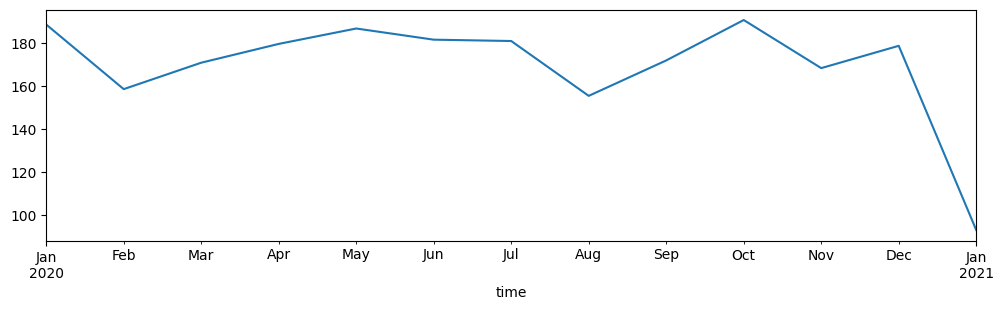

In [172]:
# 畫出各月 雨量 的平均數折線圖
s_RAINFALL.resample('M').apply(np.mean).plot()

### `.aggregate()` : 對結合後的資料調用多個敘述統計 function

如果要對一份資料同時製作多個敘述性統計分析，除了調用 `.drescibe()` method 以外，當還有額外的需求時，也可以利用這個 method 來達成。

* 參考文件：
    * [pandas.DataFrame.aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html#pandas-dataframe-aggregate)
    * [GroupBy: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine)

In [177]:
# 僅使用單一敘述統計的 function
# 例：計算各項平均值
display(df_rul.iloc[:, 2:-1].aggregate('mean'))

sensor_2      642.680934
sensor_3     1590.523119
sensor_4     1408.933782
sensor_7      553.367711
sensor_8     2388.096652
sensor_9     9065.242941
sensor_11      47.541168
sensor_12     521.413470
sensor_13    2388.096152
sensor_14    8143.752722
sensor_15       8.442146
sensor_17     393.210654
sensor_20      38.816271
sensor_21      23.289705
dtype: float64

In [179]:
# 針對各個 column 指定執行不同的敘述統計 function
# 作法：寫在 dict 內
# 例：計算 感測器2 (column label: 'sensor_2') 的最小值、
# 感測器4 (column label: 'sensor_4') 的平均值
# 以及 剩餘壽命 (column label: 'RUL') 的最大值
df_rul.aggregate({'sensor_2':'min', 'sensor_4':'mean', 'RUL': 'max'})

sensor_2     641.210000
sensor_4    1408.933782
RUL          361.000000
dtype: float64

In [180]:
# 對所有 column 指定執行多種不同的敘述統計 function
# 作法：寫在 list 內
# 例：觀察所有的平均、最大值、最小值、標準差
df_rul.iloc[:, 2:-1].aggregate(['mean', 'max', 'min', 'std'])

,sensor_2,sensor_3,sensor_4,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
mean,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705
max,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400
min,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
std,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251


In [185]:
# 也可以配合 groupby() 使用，預先集合相同條件的資料再執行敘述統計 function
# 例：觀察同年、月份資料的平均值、標準差

tmp = pd.DataFrame({"time":pd.date_range('2020-01-01 00:00:00', '2021-01-01', freq="d"), 
                    "RAINFALL":[random.randint(50, 300) for x in range(0, 367)]})
tmp["year"] = tmp["time"].dt.year
tmp["month"] = tmp["time"].dt.month
tmp.groupby(['year', 'month']).aggregate(['mean', 'std'])

RAINFALL           
                  mean        std
year month                       
2020 1      189.387097  75.084254
     2      178.172414  67.717411
     3      169.612903  78.728511
     4      161.866667  70.453572
     5      165.612903  65.653473
     6      172.666667  82.162301
     7      173.612903  63.656724
     8      177.225806  79.712696
     9      152.033333  72.280814
     10     159.677419  78.148742
     11     181.700000  76.807484
     12     189.612903  76.118188
2021 1      151.000000        NaN